In [ ]:
import pandas as pd
import pandas_profiling
import io
import numpy
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upload the files
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
uploaded_test = files.upload()

Saving test.csv to test.csv


In [ ]:
df_test = pd.read_csv(io.BytesIO(uploaded_test['test.csv']))  
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df1 = df.copy()
df1_test = df_test.copy()

In [ ]:
df['Family'] = df.SibSp	+ df.Parch
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
df_test['Family'] = df_test.SibSp	+ df_test.Parch
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
df['Family'].loc[df['Family']>0] = 1
#df['Family'] = df.Family.astype('category')
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df_test['Family'].loc[df_test['Family']>0] = 1
df_test.head()
#df_test['Family'] = df_test.Family.astype('category')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
#Also there are some useless columns like Name, Ticket which are unique values and hence can be dropped
#TRAIN DATA
df.drop('Name', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.drop('Embarked', axis=1, inplace=True)
df.drop('Fare', axis=1, inplace=True)
#TEST DATA
df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)
df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)
df_test.drop('Fare', axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Family'])
df_test = pd.get_dummies(df_test, columns=['Pclass', 'Sex', 'Family'])
df_test

,PassengerId,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1
0,892,34.5,0,0,1,0,1,1,0
1,893,47.0,0,0,1,1,0,0,1
2,894,62.0,0,1,0,0,1,1,0
3,895,27.0,0,0,1,0,1,1,0
4,896,22.0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,1,0,1,1,0
414,1306,39.0,1,0,0,1,0,1,0
415,1307,38.5,0,0,1,0,1,1,0
416,1308,NaN,0,0,1,0,1,1,0


For filling the NAN values do the following:
df.Age.fillna(value=data.Age.mean(), inplace=True)
or can use interpolate()

In [ ]:
df['Age'] = df['Age'].interpolate()
df

,PassengerId,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1
0,1,0,22.0,0,0,1,0,1,0,1
1,2,1,38.0,1,0,0,1,0,0,1
2,3,1,26.0,0,0,1,1,0,1,0
3,4,1,35.0,1,0,0,1,0,0,1
4,5,0,35.0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,1,0,0,1,1,0
887,888,1,19.0,1,0,0,1,0,1,0
888,889,0,22.5,0,0,1,1,0,0,1
889,890,1,26.0,1,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
df[['Age']] = StandardScaler().fit_transform(df[['Age']])
df

,PassengerId,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1
0,1,0,-0.556050,0,0,1,0,1,0,1
1,2,1,0.595481,1,0,0,1,0,0,1
2,3,1,-0.268167,0,0,1,1,0,1,0
3,4,1,0.379569,1,0,0,1,0,0,1
4,5,0,0.379569,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.196196,0,1,0,0,1,1,0
887,888,1,-0.771962,1,0,0,1,0,1,0
888,889,0,-0.520064,0,0,1,1,0,0,1
889,890,1,-0.268167,1,0,0,0,1,1,0


In [ ]:
df_test['Age'] = df_test['Age'].interpolate()
df_test

,PassengerId,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1
0,892,34.5,0,0,1,0,1,1,0
1,893,47.0,0,0,1,1,0,0,1
2,894,62.0,0,1,0,0,1,1,0
3,895,27.0,0,0,1,0,1,1,0
4,896,22.0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,33.5,0,0,1,0,1,1,0
414,1306,39.0,1,0,0,1,0,1,0
415,1307,38.5,0,0,1,0,1,1,0
416,1308,38.5,0,0,1,0,1,1,0


In [ ]:
df_test[['Age']] = StandardScaler().fit_transform(df_test[['Age']])
df_test

,PassengerId,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1
0,892,0.330311,0,0,1,0,1,1,0
1,893,1.257160,0,0,1,1,0,0,1
2,894,2.369380,0,1,0,0,1,1,0
3,895,-0.225799,0,0,1,0,1,1,0
4,896,-0.596539,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,0.256163,0,0,1,0,1,1,0
414,1306,0.663976,1,0,0,1,0,1,0
415,1307,0.626902,0,0,1,0,1,1,0
416,1308,0.626902,0,0,1,0,1,1,0


In [ ]:
df4 = df.copy()

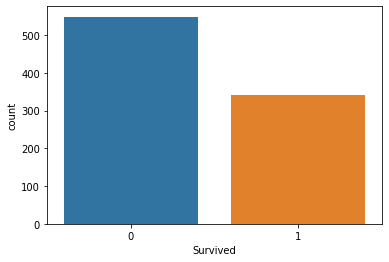

In [ ]:
sns.countplot('Survived',data=df)

In [ ]:
#The data is not balanced data. Hence we need to use RESAMPLING TECHNIQUES.

In [ ]:
y = df[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x_temp = df.drop('Survived', axis=1)
x = x_temp.drop('PassengerId', axis=1)
x

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1
0,-0.556050,0,0,1,0,1,0,1
1,0.595481,1,0,0,1,0,0,1
2,-0.268167,0,0,1,1,0,1,0
3,0.379569,1,0,0,1,0,0,1
4,0.379569,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...
886,-0.196196,0,1,0,0,1,1,0
887,-0.771962,1,0,0,1,0,1,0
888,-0.520064,0,0,1,1,0,0,1
889,-0.268167,1,0,0,0,1,1,0


In [ ]:
x.columns

Index(['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Family_0', 'Family_1'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .1, random_state=12)

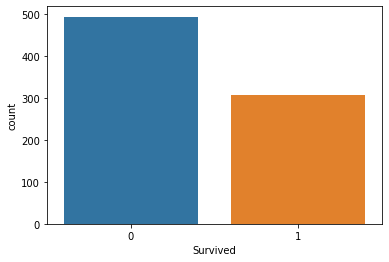

In [ ]:
sns.countplot('Survived',data=y_train)

In [ ]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm = SMOTE(ratio='minority')
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train_res.shape 

(988,)

In [ ]:
x_train.columns

Index(['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Family_0', 'Family_1'],
      dtype='object')

In [ ]:
x_train_res1 = pd.DataFrame.from_records(x_train_res)
x_train_res1.columns = ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female','Sex_male','Family_0', 'Family_1']

In [ ]:
y_train_res1 = pd.DataFrame(y_train_res)
y_train_res1.columns = ['Survived']
y_train_res1

,Survived
0,0
1,1
2,1
3,1
4,1
...,...
983,1
984,1
985,1
986,1


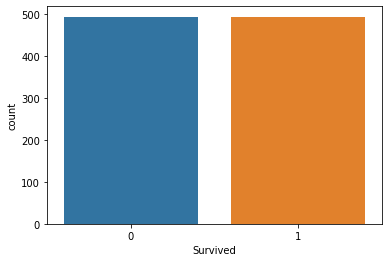

In [ ]:
sns.countplot('Survived',data=y_train_res1)

In [ ]:
x_val.shape

(90, 8)

# Now we have 

x_train_res1, y_train_res1 --> resampled train data in dataframe

x_val, y_val for testing my prediction



In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train_res1,y_train_res1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
df7 = x_train_res1.copy()
df7['Survived'] = y_train_res1
df7.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1,Survived
0,-0.771962,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
1,0.739422,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,2.322777,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.019716,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
4,-0.340138,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [ ]:
df7['log_pred']=logreg.predict(x_train_res1)
df7

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1,Survived,log_pred
0,-0.771962,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0
1,0.739422,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
2,2.322777,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
3,0.019716,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1
4,-0.340138,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
983,-0.673120,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1
984,-2.075517,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1
985,0.659585,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
986,-0.594623,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1


In [ ]:
acc_log = round(logreg.score(x_train_res1,y_train_res1) * 100, 2)
acc_log

79.55

In [ ]:
y_actual = df7['Survived'].values
y_predict = df7['log_pred'].values

In [ ]:
from sklearn import metrics
cnf_matrix_log = metrics.confusion_matrix(y_actual, y_predict)
cnf_matrix_log

array([[390, 104],
       [ 98, 396]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_actual, y_predict))
print("Precision:",metrics.precision_score(y_actual, y_predict))
print("Recall:",metrics.recall_score(y_actual, y_predict))

Accuracy: 0.7955465587044535
Precision: 0.792
Recall: 0.8016194331983806


In [ ]:
# Algorithms
#from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x,y)
#y_pred_sgd = sgd.predict(x_test)
df7['sgd_pred']=sgd.predict(x_train_res1)
sgd.score(x,y)

acc_sgd = round(sgd.score(x_train_res1,y_train_res1) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


76.72

In [ ]:
df7

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1,Survived,log_pred,sgd_pred
0,-0.771962,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0
1,0.739422,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1
2,2.322777,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,1
3,0.019716,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1,1
4,-0.340138,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
983,-0.673120,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,1
984,-2.075517,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0
985,0.659585,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1
986,-0.594623,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,1


In [ ]:
y_pred_sgd = df7['sgd_pred'].values
cnf_matrix_sgd = metrics.confusion_matrix(y_actual, y_pred_sgd)
cnf_matrix_sgd

array([[393, 101],
       [129, 365]])

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train_res1,y_train_res1)  
df7['tree_pred']= decision_tree.predict(x_train_res1)  
acc_tree = round(decision_tree.score(x_train_res1,y_train_res1) * 100, 2)
acc_tree

93.72

In [ ]:
y_pred_tree = df7['tree_pred'].values
cnf_matrix_tree = metrics.confusion_matrix(y_actual, y_pred_tree)
cnf_matrix_tree

array([[484,  10],
       [ 52, 442]])

[Text(142.2330546586716, 212.49818181818182, 'X[5] <= 0.5\ngini = 0.5\nsamples = 988\nvalue = [494, 494]'),
 Text(47.776176199262, 202.61454545454546, 'X[3] <= 0.5\ngini = 0.287\nsamples = 420\nvalue = [73, 347]'),
 Text(13.589667896678968, 192.73090909090908, 'X[0] <= -1.959\ngini = 0.069\nsamples = 251\nvalue = [9, 242]'),
 Text(10.295202952029522, 182.84727272727272, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(8.647970479704798, 172.96363636363637, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(11.942435424354244, 172.96363636363637, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(16.884132841328416, 182.84727272727272, 'X[0] <= -0.431\ngini = 0.062\nsamples = 249\nvalue = [8, 241]'),
 Text(15.236900369003692, 172.96363636363637, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(18.531365313653136, 172.96363636363637, 'X[0] <= -0.19\ngini = 0.086\nsamples = 178\nvalue = [8, 170]'),
 Text(8.236162361623617, 163.07999999999998, 'X[0] <= -0.347\ngini = 0.269\n

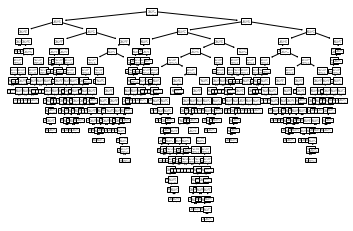

In [ ]:
from sklearn import tree
tree.plot_tree(decision_tree.fit(x_train_res1,y_train_res1))

In [ ]:
dt = tree.DecisionTreeClassifier() 
dt.fit(x_train_res1,y_train_res1)  

NameError: ignored

[Text(147.43323016109787, 212.49818181818182, 'X[5] <= 0.5\ngini = 0.5\nsamples = 988\nvalue = [494, 494]'),
 Text(55.93941676610979, 202.61454545454546, 'X[3] <= 0.5\ngini = 0.287\nsamples = 420\nvalue = [73, 347]'),
 Text(13.184248210023867, 192.73090909090908, 'X[0] <= -1.959\ngini = 0.069\nsamples = 251\nvalue = [9, 242]'),
 Text(9.988066825775658, 182.84727272727272, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(8.389976133651553, 172.96363636363637, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.586157517899762, 172.96363636363637, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(16.380429594272076, 182.84727272727272, 'X[0] <= -0.431\ngini = 0.062\nsamples = 249\nvalue = [8, 241]'),
 Text(14.782338902147973, 172.96363636363637, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(17.978520286396183, 172.96363636363637, 'X[0] <= -0.19\ngini = 0.086\nsamples = 178\nvalue = [8, 170]'),
 Text(7.990453460620525, 163.07999999999998, 'X[0] <= -0.347\ngini = 0.269

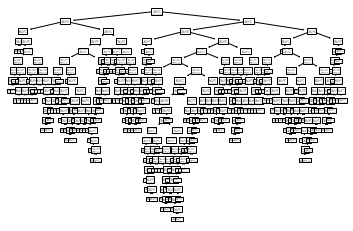

In [ ]:
tree.plot_tree(decision_tree.fit(x_train_res1,y_train_res1))

In [ ]:
pip install graphviz

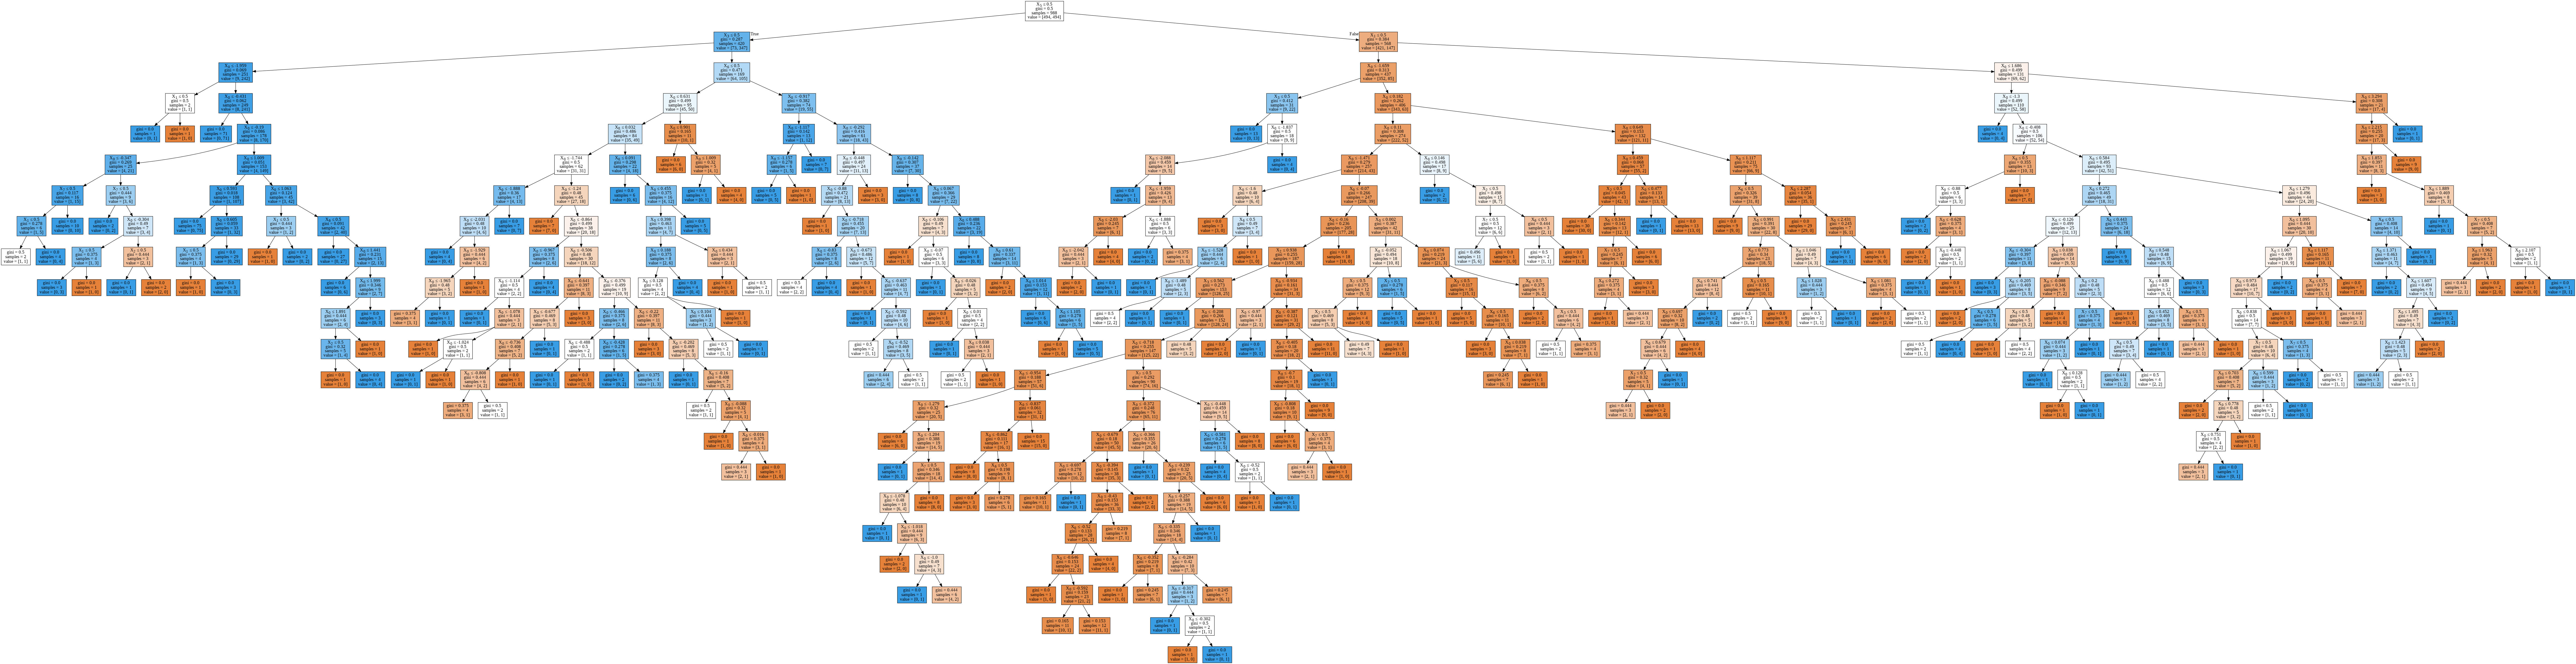

In [ ]:
from sklearn.externals.six import StringIO  
import graphviz
import pydotplus
from IPython.display import Image  
dot_data = StringIO() 
export_graphviz(decision_tree, out_file=dot_data, filled=True,special_characters=True) 
#dot_data = tree.export_graphviz(decision_tree, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("C:/Users/Naganandini/Nandu/kaggle_data/titanic/Nirzaree")
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Lets try to use Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [ ]:
import numpy as np
import time

In [ ]:
#Hyper-Parameter Optimization using GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#cv_rf.fit(training_set, class_set)
cv_rf.fit(x_train_res1, y_train_res)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  60.98


In [ ]:
# Set best parameters given by grid search 
fit_rf.set_params(n_estimators=200,
                  bootstrap = True,
                  criterion = 'gini',
                  max_features = 'auto', 
                  oob_score = True,
                  max_depth = 4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
fit_rf.fit(x_train_res1,y_train_res1)
df7['pred_rf'] = fit_rf.predict(x_train_res1)
y_pred_rf = df7['pred_rf'].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
df7

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1,Survived,log_pred,sgd_pred,tree_pred,pred_rf
0,-0.771962,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0
1,0.739422,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1
2,2.322777,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,1,1,1
3,0.019716,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1,1,0,1
4,-0.340138,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-0.673120,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1
984,-2.075517,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0,1,1
985,0.659585,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1
986,-0.594623,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1


In [ ]:
fit_rf.score(x_train_res1,y_train_res1)
acc_rf = round(fit_rf.score(x_train_res1,y_train_res1) * 100, 2)
acc_rf

81.28

In [ ]:
cnf_matrix_rf = metrics.confusion_matrix(y_actual, y_pred_rf)
cnf_matrix_rf

array([[418,  76],
       [109, 385]])

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200, oob_score = True)
random_forest.fit(x_train_res1,y_train_res1)
y_pred_rf_simple = random_forest.predict(x_train_res1)

random_forest.score(x_train_res1,y_train_res1)

acc_random_forest = round(random_forest.score(x_train_res1,y_train_res1) * 100, 2)
acc_random_forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


93.72

In [ ]:
cnf_matrix_rf_sim = metrics.confusion_matrix(y_actual, y_pred_rf_simple)
cnf_matrix_rf_sim

array([[468,  26],
       [ 36, 458]])

In [ ]:
#Hyper-Parameter Optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# create random forest classifier model
rf_model = RandomForestClassifier()

model_params = {
    # randomly sample numbers from 4 to 250 estimators
    'n_estimators': randint(4,250),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
rscv_rf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)
rscv_rf.fit(x_train_res1,y_train_res1)

print('Best Parameters using grid search: \n', rscv_rf.best_params_)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Best Parameters using grid search: 
 {'max_features': 0.3252141636372302, 'min_samples_split': 0.02846736091950685, 'n_estimators': 61}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
rscv_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.3252141636372302, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.02846736091950685,
                       min_weight_fraction_leaf=0.0, n_estimators=61,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_model.set_params(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.305449707709841, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.017163887838897683,
                       min_weight_fraction_leaf=0.0, n_estimators=68,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.305449707709841, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.017163887838897683,
                       min_weight_fraction_leaf=0.0, n_estimators=68,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_model.fit(x_train_res1,y_train_res1)
df7['pred_rf_rscv'] = rf_model.predict(x_train_res1)
y_pred_rf_rscv = df7['pred_rf_rscv'].values
acc_rf_rscv = round(rf_model.score(x_train_res1,y_train_res1) * 100, 2)
cnf_matrix_rf_rscv = metrics.confusion_matrix(y_actual, y_pred_rf_rscv)
print(acc_rf_rscv)
print(cnf_matrix_rf_rscv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


87.25
[[437  57]
 [ 69 425]]


In [ ]:
#Lets try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

param_grid = [
{'n_estimators':[200, 220], 'max_features':[1,2]},
{'bootstrap':[False], 'n_estimators':[200, 220], 'max_features':[1,2]}             
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, return_train_score=True)
grid_search.fit(x_train_res1,y_train_res1)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
features = grid_search.best_estimator_.feature_importances_

In [ ]:
cols = x_train_res1.columns

We will see the features and columns mapped against each other and sorted too

In [ ]:
sorted(zip(features, cols), reverse=True)

[(0.5118386005813644, 'Age'),
 (0.17482218714495382, 'Sex_male'),
 (0.1556640143764451, 'Sex_female'),
 (0.06295944844570155, 'Pclass_3'),
 (0.043430328293445834, 'Pclass_1'),
 (0.019494698276952688, 'Pclass_2'),
 (0.017075681089052795, 'Family_1'),
 (0.014715041792083825, 'Family_0')]

In [ ]:
forest_reg.set_params(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
forest_reg.fit(x_train_res1,y_train_res1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
df7['pred_rf_reg'] = forest_reg.predict(x_train_res1)
y_pred_rf_reg = df7['pred_rf_reg'].values
acc_rf_reg = round(forest_reg.score(x_train_res1,y_train_res1) * 100, 2)
acc_rf_reg

79.45

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(x_train_res1,y_train_res1)  
y_pred_gauss = gaussian.predict(x_train_res1)
df7['gauss_pred'] = y_pred_gauss
acc_gaussian = round(gaussian.score(x_train_res1,y_train_res1) * 100, 2)
acc_gaussian

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78.44

In [ ]:
cnf_matrix_gauss = metrics.confusion_matrix(y_actual, y_pred_gauss)
cnf_matrix_gauss

array([[398,  96],
       [117, 377]])

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(x_train_res1,y_train_res1)

y_pred_svc = linear_svc.predict(x_train_res1)
df7['linear_svc_pred']  = y_pred_svc

acc_linear_svc = round(linear_svc.score(x_train_res1,y_train_res1) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


77.43

In [ ]:
cnf_matrix_svc = metrics.confusion_matrix(y_actual, y_pred_svc)
cnf_matrix_svc

array([[399,  95],
       [128, 366]])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(objective='binary:logistic')
param_grid_xgboost = {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5, 10, 20],
                'n_estimators': [10, 50, 100, 200]
            }
xb_grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5)
xb_grid.fit(x_train_res1,y_train_res1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.742, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.788, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.813, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.817, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.853, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.742, total=   0.0s
[CV] learning_rate=0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.787, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.883, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.742, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.768, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.773, total=   0.

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   25.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 2

In [ ]:
xb_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 10}

In [ ]:
# creating a new model with the best parameters
            xgb = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=10)
            # training the mew model
            xgb.fit(x_train_res1,y_train_res1)
            

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

df7['pred_xgb'] = xgb.predict(x_train_res1)
y_pred_xgb = df7['pred_xgb'].values

xgb.score(x_train_res1,y_train_res1)
acc_xgb = round(xgb.score(x_train_res1,y_train_res1) * 100, 2)
acc_xgb

cnf_matrix_xgb = metrics.confusion_matrix(y_actual, y_pred_xgb)
cnf_matrix_xgb

array([[418,  76],
       [ 99, 395]])

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest Simple', 'Random Forest Complex', 'Naive Bayes',  
              'Stochastic Gradient Decent', 'Decision Tree', 'RF_RandomisedSCV', 'XG_Boost'],
    'Score': [acc_linear_svc,  acc_log, acc_random_forest, acc_rf, acc_gaussian, 
              acc_sgd, acc_tree, acc_rf_rscv, acc_xgb],
    'CNF_matrix': [cnf_matrix_svc, cnf_matrix_log, 
                   cnf_matrix_rf_sim, cnf_matrix_rf, cnf_matrix_gauss, 
                   cnf_matrix_sgd, cnf_matrix_tree, cnf_matrix_rf_rscv, cnf_matrix_xgb]          
              })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,CNF_matrix
Score,,
93.72,Random Forest Simple,"[[468, 26], [36, 458]]"
93.72,Decision Tree,"[[484, 10], [52, 442]]"
87.25,RF_RandomisedSCV,"[[437, 57], [69, 425]]"
82.29,XG_Boost,"[[418, 76], [99, 395]]"
81.28,Random Forest Complex,"[[418, 76], [109, 385]]"
79.55,Logistic Regression,"[[390, 104], [98, 396]]"
78.44,Naive Bayes,"[[398, 96], [117, 377]]"
77.43,Support Vector Machines,"[[399, 95], [128, 366]]"
76.72,Stochastic Gradient Decent,"[[393, 101], [129, 365]]"


In [ ]:
#cross check with our validation data

pred = random_forest.predict(x_val)
acc1 = round(random_forest.score(x_val,y_val) * 100, 2)
acc1

78.89

In [ ]:
y_pred_xgb = xgb.predict(x_val)
acc_xgb = round(xgb.score(x_val,y_val) * 100, 2)
acc_xgb

73.33

In [ ]:
df_test.columns

Index(['PassengerId', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Family_0', 'Family_1'],
      dtype='object')

Now, we will use the model 'Random Forest Simple' to predict the test file

In [ ]:
df_test1 = df_test.copy()
df_test1.drop(['PassengerId'], axis=1, inplace=True)
df_test1

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Family_0,Family_1
0,0.330311,0,0,1,0,1,1,0
1,1.257160,0,0,1,1,0,0,1
2,2.369380,0,1,0,0,1,1,0
3,-0.225799,0,0,1,0,1,1,0
4,-0.596539,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
413,0.256163,0,0,1,0,1,1,0
414,0.663976,1,0,0,1,0,1,0
415,0.626902,0,0,1,0,1,1,0
416,0.626902,0,0,1,0,1,1,0


In [ ]:
df_test1.shape

(418, 8)

In [ ]:
x_train_res1.shape

(988, 8)

In [ ]:
my_predictions = random_forest.predict(df_test1)
final_df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':my_predictions})
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final_df.to_csv('nags_rf_resample.csv',index=False)
files.download('nags_rf_resample.csv') 

MessageError: ignored

In [ ]:
my_predictions = decision_tree.predict(df_test1)
final_df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':my_predictions})
final_df.to_csv('nags_dt_resample.csv',index=False)
files.download('nags_dt_resample.csv') 

In [ ]:
my_predictions = rf_model.predict(df_test1)
final_df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':my_predictions})
final_df.to_csv('nags_rf_rscv_resample.csv',index=False)
files.download('nags_rf_rscv_resample.csv')

In [ ]:
my_predictions = xgb.predict(df_test1)
final_df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':my_predictions})
final_df.to_csv('nags_xgb_resample.csv',index=False)
files.download('nags_xgb_resample.csv')